# Library for neural networks

Feedforward neural networks for supervised learning

## Imports

In [1]:
from classes import Neuron, Layer, Network_Model
import helpers as hlp
import color_helpers as chlp
import pandas as pd
import matplotlib.pyplot as plt

## Preprocess input data

The `pandas`-Library is used to preprocess input data.
Firstly, data is read from an Excel-file.

In [2]:
training_orig_df = pd.read_excel('datasets\\rgb.xlsx')
training_orig_df

,Name,R,G,B,Beige,Yellow,Orange,Red,Purple,Blue,Green,Grey,Brown,White,Black
0,Beige,138,102,66,1,0,0,0,0,0,0,0,0,0,0
1,Beige,169,131,7,1,0,0,0,0,0,0,0,0,0,0
2,Beige,190,189,127,1,0,0,0,0,0,0,0,0,0,0
3,Beige,194,176,120,1,0,0,0,0,0,0,0,0,0,0
4,Beige,198,166,100,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Yellow,244,169,0,0,1,0,0,0,0,0,0,0,0,0
209,Yellow,245,208,51,0,1,0,0,0,0,0,0,0,0,0
210,Yellow,248,243,53,0,1,0,0,0,0,0,0,0,0,0
211,Yellow,250,210,1,0,1,0,0,0,0,0,0,0,0,0


In [3]:
training_df = training_orig_df.copy()
training_df.drop(columns=['Name'], inplace=True)

The data is then split into training and validation data using the `split_training_val_data()` function. Here a percentage can be set.

In [4]:
train_df, val_df = hlp.split_training_val_data(training_df, 0.2)

The training and validation data are then split into input and output data using the `split_input_output_data()` function. The column headers of the training input have to specified.

In [5]:
x_columns = ['R', 'G', 'B']
y_columns = ['Beige', 'Yellow', 'Orange', 'Red', 'Purple', 'Blue', 'Green', 'Grey', 'Brown', 'White', 'Black']

train_df_x, train_df_y = hlp.split_input_output_data(train_df, x_columns, y_columns)
val_df_x, val_df_y = hlp.split_input_output_data(val_df, x_columns, y_columns)

In [6]:
train_df_x_norm = hlp.normalize(train_df_x, 0, 255, -1, 1)
val_df_x_norm = hlp.normalize(val_df_x, 0, 255, -1, 1)

In [7]:
train_df_x_norm

,R,G,B
0,0.082353,-0.200000,-0.482353
1,0.490196,0.482353,-0.003922
2,0.521569,0.380392,-0.058824
3,0.552941,0.301961,-0.215686
4,0.607843,0.286275,-0.592157
...,...,...,...
165,0.874510,0.325490,-0.419608
166,0.905882,0.247059,-0.811765
167,0.905882,0.294118,-0.960784
168,0.945098,0.905882,-0.584314


## Instanciate a model

`add_layer` adds a new layer to the model. The amount of neurons and the desired activation function can be set. Layer 0 is automatically set to be the input layer. Weights and biases are randomly assigned.

In [8]:
mdl = Network_Model()
mdl.add_layer(3)
mdl.add_layer(16, activation_function='sigmoid')
mdl.add_layer(11, activation_function='sigmoid')

Using `plot_network`, the Model can be visualized.

In [9]:
mdl.plot_network()

<div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(0, 1)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(0, 2)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(0, 3)<br>net 0<br>act 0<br>out 0</div>

<div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 1)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 2)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 3)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 4)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 5)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 6)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 7)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 8)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 9)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 10)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 11)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 12)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 13)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 14)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 15)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 16)<br>net 0<br>act 0<br>out 0</div>

<div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 1)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 2)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 3)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 4)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 5)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 6)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 7)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 8)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 9)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 10)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 11)<br>net 0<br>act 0<br>out 0</div>

Using `get_weights()`, the weights can be displayed. Weihts of row 0 are weights of the bias neuron of the respective layer.

In [10]:
mdl.layers[1].get_weights()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.506228,-0.021506,0.773269,-0.599807,0.682531,0.839760,-0.185028,-0.516564,-0.581524,-0.478289,0.778081,-0.615481,-0.898625,-0.225850,-0.940968,0.153242
1,-0.667075,-0.066505,0.197652,-0.417033,-0.003006,-0.655488,-0.032162,-0.765115,-0.118753,0.636937,-0.425144,0.956141,-0.137021,-0.669964,-0.323869,-0.749816
2,0.740055,-0.249126,-0.507878,-0.003430,-0.341776,0.095473,-0.876012,-0.610149,-0.331005,0.443036,0.118634,0.948953,0.486803,0.907122,0.173056,-0.890446
3,-0.512343,-0.989201,0.241404,-0.529158,0.912006,-0.806030,-0.336268,-0.830312,-0.045573,-0.339299,0.539326,-0.251209,-0.561529,-0.438973,0.751982,0.654794


Using the `predict()` method, a prediction is made based on a given input-vector. Since the model is not trained yet, the output is random.

In [11]:
rgb = [67, 38, 26]
input = chlp.rgb_to_norm(rgb)
pred = mdl.predict(input)
print(y_columns[pred.index(max(pred))])
chlp.plot_color(input)

Purple


<div style="height: 100px; width: 100px; background-color: rgb(67.575,38.25000000000001,25.499999999999993);"></div>

## Training the model

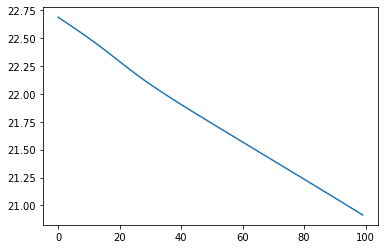

In [18]:
history = mdl.train(train_df_x_norm, train_df_y, epochs=100, debug=False, learning_rate=0.5)
plt.plot(history)

In [33]:
rgb = [1, 1, 0] # https://www.w3schools.com/colors/colors_rgb.asp
input = chlp.rgb_to_norm(rgb)
pred = mdl.predict(input)
print(y_columns[pred.index(max(pred))])
chlp.plot_color(input)

# 'Beige', 'Yellow', 'Orange', 'Red', 'Purple', 'Blue', 'Green', 'Grey', 'Brown', 'White', 'Black'

Black


<div style="height: 100px; width: 100px; background-color: rgb(1.2750000000000012,1.2750000000000012,0.0);"></div>